# Problem set 4

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


### Exercise 1. Penn world table

[*Penn World Table*](https://www.rug.nl/ggdc/productivity/pwt/?lang=en) is a data set containing income levels, output, input and productivity for 183 countries between 1950 and 2019. The variables included in the data set are described in the *Legend* sheet in *pwt100.xlsx*.

- Read the sheet *Data* in *pwt100.xlsx* as a Pandas data frame using the `read_excel` function. (Note: This will take a bit more time.)

In [43]:
pwt = pd.read_excel("data/pwt100.xlsx", sheet_name="Data")

- Use the `info` method to print the summary of the columns.

In [39]:
pwt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12810 entries, 0 to 12809
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countrycode    12810 non-null  object 
 1   country        12810 non-null  object 
 2   currency_unit  12810 non-null  object 
 3   year           12810 non-null  int64  
 4   rgdpe          10399 non-null  float64
 5   rgdpo          10399 non-null  float64
 6   pop            10399 non-null  float64
 7   emp            9529 non-null   float64
 8   avh            3492 non-null   float64
 9   hc             8637 non-null   float64
 10  ccon           10399 non-null  float64
 11  cda            10399 non-null  float64
 12  cgdpe          10399 non-null  float64
 13  cgdpo          10395 non-null  float64
 14  cn             10314 non-null  float64
 15  ck             7095 non-null   float64
 16  ctfp           6412 non-null   float64
 17  cwtfp          6412 non-null   float64
 18  rgdpna

- Change the name of the *rdgpe* column to *gdp* (in place).

In [44]:
pwt.rename(columns={"rgdpe":"gdp"}, inplace=True)
pwt.head()

,countrycode,country,currency_unit,year,gdp,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Create a subset of data for year 2019 with the following columns: countrycode, country, currency_unit, gdp, pop, emp. Use this subset in all remaining tasks.

In [51]:
pwt_subset = pwt.loc[pwt["year"] == 2019, ["countrycode", "country", "currency_unit", "gdp", "pop", "emp"]]

- How many countries are included in the subset?

In [46]:
pwt_subset.countrycode.nunique()

183

- Set the countrycode column as the index (in place).

In [54]:
pwt_subset.set_index("countrycode", inplace=True)

KeyError: "None of ['countrycode'] are in the columns"

- Show the data for Norway.

In [56]:
pwt_subset.loc["NOR"]

country                   Norway
currency_unit    Norwegian Krone
gdp                 336415.40625
pop                     5.378857
emp                     2.853662
Name: NOR, dtype: object

- Show the summary statistics for all numeric columns (using the `describe` method).

In [57]:
pwt_subset.describe()

,gdp,pop,emp
count,1.830000e+02,183.000000,177.000000
mean,6.856771e+05,41.425665,18.736708
std,2.326857e+06,150.991398,72.598856
min,9.919158e+01,0.004989,0.002537
25%,2.542229e+04,2.148923,0.966091
50%,8.906167e+04,8.955102,4.235073
75%,4.438705e+05,29.763979,11.694400
max,2.086051e+07,1433.783686,798.807739


- Sort the data set by the population size, starting with the biggest countries, and print rows for the 10 most populated countries.

In [58]:
pwt_subset.sort_values(by="pop", ascending=False).head(10)

,country,currency_unit,gdp,pop,emp
countrycode,,,,,
CHN,China,Yuan Renminbi,2.005607e+07,1433.783686,798.807739
IND,India,Indian Rupee,8.945547e+06,1366.417754,497.615723
USA,United States,US Dollar,2.086051e+07,329.064917,158.299591
IDN,Indonesia,Rupiah,3.104439e+06,270.625568,131.170685
PAK,Pakistan,Pakistan Rupee,1.036800e+06,216.565318,63.085052
BRA,Brazil,Brazilian Real,3.089274e+06,211.049527,93.956825
NGA,Nigeria,Naira,9.834982e+05,200.963599,73.020554
BGD,Bangladesh,Taka,7.563556e+05,163.046161,65.534065
RUS,Russian Federation,Russian Ruble,4.197222e+06,145.872256,71.670639


- Drop (in place) rows with missing values. (Hint: Use the `dropna` method.)

In [59]:
pwt.dropna(inplace=True)

- Calculate GDP per capita and add it as a column to the subset.

In [60]:
pwt["gdp_per_capita"] = pwt["gdp"] / pwt["pop"]

- Show the first 15 countries with the highest GDP per capita.

In [64]:
pwt.sort_values(by="gdp_per_capita", ascending=False).head(15)

,countrycode,country,currency_unit,year,gdp,rgdpo,pop,emp,avh,hc,...,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,gdp_per_capita
9517,POL,Poland,Zloty,2017,1.141621e+06,1.102457e+06,37.953180,16.137400,2029.358259,3.404202,...,-0.332127,0.031353,0.478041,0.506532,0.378749,0.659758,0.595318,0.402531,0.808224,30079.719275
9516,POL,Poland,Zloty,2016,1.098284e+06,1.055274e+06,37.989220,15.941554,2051.479344,3.378103,...,-0.306327,0.020895,0.440781,0.499729,0.359193,0.644594,0.583667,0.377628,0.757988,28910.425115
9932,RUS,Russian Federation,Russian Ruble,2012,4.151727e+06,4.283520e+06,143.993892,72.050728,1982.000000,3.327325,...,-0.111983,-0.027986,0.528751,0.747920,0.399374,0.580576,0.677660,0.727165,0.536874,28832.662222
9933,RUS,Russian Federation,Russian Ruble,2013,4.091233e+06,4.245878e+06,144.325449,71.860641,1980.000000,3.342167,...,-0.110724,-0.038364,0.589139,0.706225,0.420173,0.596356,0.693535,0.729011,0.508677,28347.273668
9515,POL,Poland,Zloty,2015,1.069768e+06,1.033508e+06,38.034079,15.824997,2049.009142,3.352443,...,-0.316534,0.017589,0.456946,0.516399,0.373115,0.649805,0.583649,0.397493,0.849334,28126.574986
9934,RUS,Russian Federation,Russian Ruble,2014,3.996437e+06,4.074534e+06,144.664841,70.895790,1985.000000,3.357158,...,-0.102288,-0.038184,0.532132,0.705067,0.378293,0.613767,0.707795,0.613120,0.424458,27625.490910
9931,RUS,Russian Federation,Russian Ruble,2011,3.860054e+06,3.970287e+06,143.703025,71.362312,1979.000000,3.312630,...,-0.113013,-0.022316,0.535224,0.758509,0.375884,0.574132,0.693453,0.722161,0.523603,26861.329120
9937,RUS,Russian Federation,Russian Ruble,2017,3.907710e+06,3.899889e+06,145.530082,71.799873,1979.000000,3.403041,...,-0.099523,-0.016620,0.414553,0.548268,0.285819,0.561338,0.669793,0.458126,0.301033,26851.558429
9514,POL,Poland,Zloty,2014,1.002208e+06,9.882622e+05,38.091089,15.601132,2041.321912,3.327214,...,-0.349969,0.015219,0.547834,0.628913,0.460265,0.712667,0.642046,0.483178,1.015275,26310.820688
8537,MYS,Malaysia,Malaysian Ringgit,2017,8.148392e+05,7.514624e+05,31.104646,14.459715,2197.058086,3.034126,...,-0.453873,-0.003402,0.387910,0.394099,0.403863,0.647573,0.570911,0.242851,0.576529,26196.705470


- Plot a bar chart showing GDP per capita for these countries.

<AxesSubplot:xlabel='country', ylabel='gdp_per_capita'>

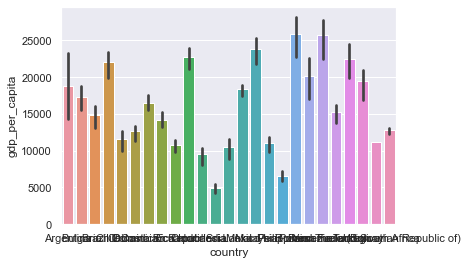

In [67]:
sns.barplot(x="country", y="gdp_per_capita", data=pwt)

- Calculate the employment rate (i.e. 100 * emp / pop) and add it as a column to the subset.

In [68]:
pwt["emp_rate"] = 100 * pwt["emp"] / pwt["pop"]

- Make a scatter plot showing the GDP per capita on the x-axis and the employment rate on the y-axis for the 15 countries with the highest GDP per capita. 

  Use suitable descriptions of both axes (instead of the column names).

  Extra challenge: Annotate each point with the country code. Use a loop and iterate over the index of the data frame (with those 15 countries). For each label use the `plt.text` function to add it to the plot at the coordinates given by the GDP per capita and employment rate for that label.

<AxesSubplot:xlabel='gdp_per_capita', ylabel='emp_rate'>

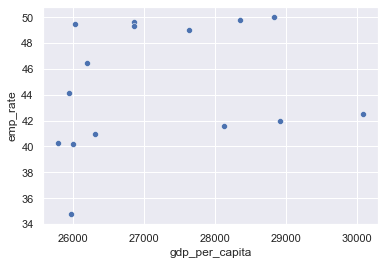

In [71]:
sns.scatterplot(x="gdp_per_capita", y="emp_rate", data=pwt.sort_values(by="gdp_per_capita", ascending=False).head(15))

### Exercise 2. Credit risk

The data set stored in *credit_risk.xlsx* contains the following information on 700 customers who have been given a loan in an undisclosed bank:

- default: 1 if the customer has previously defaulted on their debt, 0 otherwise
- age: customer's age
- employ: years with the current employer
- address: years at the current address
- income: household income in thousands
- creddebt: the credit card debt in thousands
- othdebt: other debt in thousands

Solve the tasks described below.

- Read the file to a Pandas data frame.

In [74]:
cr = pd.read_excel("data/credit_risk.xlsx")

- Compute debt-to-income ratio and add it as a new column to the data frame. 

In [75]:
cr["debt_to_income"] = (cr["creddebt"] + cr["othdebt"]) / cr["income"]

- Use the `describe` method to show the summary statistics for all columns.

In [76]:
cr.describe()

,default,age,employ,address,income,creddebt,othdebt,debt_to_income
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.261429,34.860000,8.388571,8.278571,45.601429,1.553553,3.058209,0.102606
std,0.439727,7.997342,6.658039,6.824877,36.814226,2.117197,3.287555,0.068272
min,0.000000,20.000000,0.000000,0.000000,14.000000,0.011696,0.045584,0.004000
25%,0.000000,29.000000,3.000000,3.000000,24.000000,0.369059,1.044178,0.050000
50%,0.000000,34.000000,7.000000,7.000000,34.000000,0.854869,1.987567,0.086000
75%,1.000000,40.000000,12.000000,12.000000,55.000000,1.901955,3.923065,0.141250
max,1.000000,56.000000,31.000000,34.000000,446.000000,20.561310,27.033600,0.413000


- Show the same summary for the customers who have previously defaulted on their debt.

In [77]:
cr.loc[cr["default"] == 1].describe()

,default,age,employ,address,income,creddebt,othdebt,debt_to_income
count,183.0,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,1.0,33.010929,5.224044,6.393443,41.213115,2.423865,3.862807,0.147279
std,0.0,8.517589,5.542946,5.925208,43.115529,3.232522,4.263684,0.079028
min,1.0,20.000000,0.000000,0.000000,14.000000,0.072885,0.160983,0.009000
25%,1.0,27.000000,1.000000,2.000000,21.000000,0.543552,1.317870,0.085500
50%,1.0,31.000000,3.000000,5.000000,29.000000,1.376844,2.529508,0.138000
75%,1.0,39.000000,8.000000,10.000000,45.500000,2.710806,4.650975,0.193500
max,1.0,55.000000,31.000000,29.000000,446.000000,20.561310,27.033600,0.413000


- Draw scatter plots showing the income on the x-axis and the credit card debt on the y-axis. Then modify the plot and use a different color for points representing customers who previously defaulted on their debt.

<AxesSubplot:xlabel='income', ylabel='creddebt'>

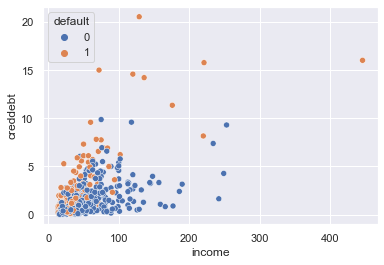

In [79]:
sns.scatterplot(x="income", y="creddebt", data=cr, hue="default")

- Plot a histogram of the debt-to-income ratio. Add a density estimate.

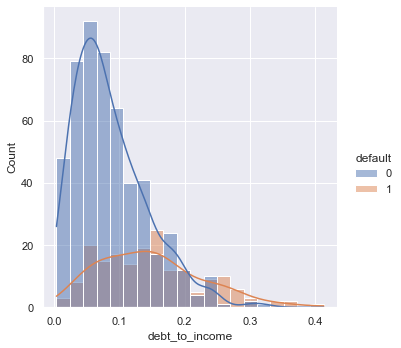

In [81]:
sns.displot(x="debt_to_income", data=cr, hue="default", kde=True)

- Make a [box plot](https://en.wikipedia.org/wiki/Box_plot) showing the household income in the following age groups: (20, 30], (30, 40], (40, 50] and (50, 60].

  Hint: Use the `pd.cut` function to assign customers to the age groups.

<AxesSubplot:xlabel='age', ylabel='income'>

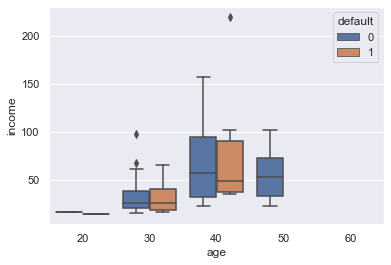

In [82]:
sns.boxplot(x="age", y="income", data=cr, hue="default", order=[20, 30, 40, 50, 60])

- Make a [violin plot](https://en.wikipedia.org/wiki/Violin_plot) showing the debt-to-income ratio in the same age groups.

<AxesSubplot:xlabel='age', ylabel='debt_to_income'>

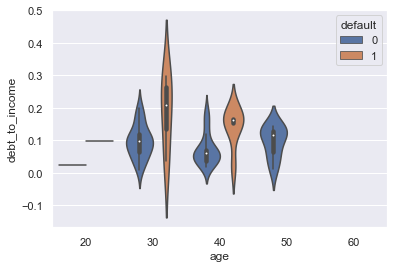

In [83]:
sns.violinplot(x="age", y="debt_to_income", data=cr, hue="default", order=[20, 30, 40, 50, 60])

### Exercise 3. Tesla stock prices

The dataset *TSLA.csv* contains historical open, high, low, close and adj. close prices as well as the trading volume for the TSLA stock on each trading day in 2020.

Solve the tasks described below.

- Import the dataset. Use the date as the index (do not forget to import it as a date column).

In [87]:
Tesla = pd.read_csv("data/TSLA_2.csv", index_col=0, parse_dates=True)

- Select the data for March 2020.

In [88]:
Tesla.loc["2020-03"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,142.251999,148.738007,137.334000,148.723999,148.723999,100975000
2020-03-03,161.000000,161.395996,143.222000,149.102005,149.102005,128920000
2020-03-04,152.792007,153.304001,144.945999,149.899994,149.899994,75245000
2020-03-05,144.753998,149.149994,143.613998,144.908005,144.908005,54263500
2020-03-06,138.000000,141.399994,136.854004,140.695999,140.695999,63314500
2020-03-09,121.078003,132.600006,121.000000,121.599998,121.599998,85368500
2020-03-10,131.886002,133.600006,121.599998,129.065994,129.065994,77972000
2020-03-11,128.039993,130.716003,122.599998,126.846001,126.846001,66612500
2020-03-12,116.178001,118.900002,109.250000,112.110001,112.110001,94545500


- Create a line plot of the close price (as a function of time).

<AxesSubplot:xlabel='Date'>

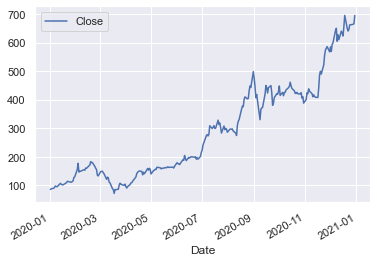

In [91]:
Tesla.plot(y="Close")

- Calculate and plot the daily returns (in percents). (Hint: look up the `shift` method in the documentation.)

<AxesSubplot:xlabel='Date'>

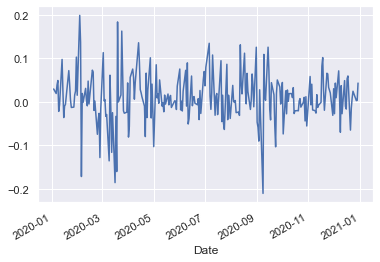

In [92]:
Tesla.Close.pct_change().plot()

#### References

Feenstra, Robert C., Robert Inklaar and Marcel P. Timmer (2015), "The Next Generation of the Penn World Table" American Economic Review, 105(10), 3150-3182, available for download at www.ggdc.net/pwt